# Portfolio Project: Analyze Airbnb Data with Python

## Introduction

In this project, you will interpret data from Airbnb containing listing activity and metrics within some major city. In this example we are using the [listings.csv](http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv) data from the New York City dataset, however to keep this project unique and open-ended please feel free to choose whichever major city and datasets you'd prefer - which can be found from [Inside Airbnb data](http://insideairbnb.com/get-the-data/).

You will perform some data analysis and investigate if there are any patterns or themes that may influence the demand and availability of listing properties on Airbnb. In this project you will load, clean, process, analyze, and visualize data. You will also pose questions, and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings.

### Project Goals

This project is left open-ended to allow for you to explore and showcase your data analytics knowledge and skills as you best see fit. That being said, defining a projects scope and purpose is always a good place to start when beginning a new project to help keep you on the right track. 

Here are a few example questions that you can consider during the course of this analysis:
- What are the most important factors considered when a customer decides on renting an Airbnb property?
- What types of rooms are most popular?
- How does location affect property price and demand?
- Which neighborhoods have the most listings?

Remember, the questions posed above are just an example to help give you some ideas for getting started - but please feel free to come up with your own questions and analysis to help showcase your creativity and skillset even further!

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this data analysis project. In this example we'll make use of the following popular packages:
- pandas
- numpy
- maplotlib
- seaborn

In [182]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

The `listings.csv` dataset contains Airbnb listing activity and metrics within New York City. This dataset contains:

**39881 rows** - each row is a different Airbnb listing<br> 
**18 columns**


| Column name | Description |
| --- | --- |
| id | Listing id |
| name | Name of listing |
| host_id | Host id |
| host_name | Name of host |
| neighbourhood_group | Neighbourhood group the listing is in |
| neighbourhood | Neighbourhood the listing is in |
| latitude | Latitude coordinate of listing location |
| longitude | Longitude coordinate of listing location |
| room_type | Room type of the listing |
| price | Price of the listing |
| minimum_nights | Minimum number of nights stay for listing |
| number_of_reviews | Number of reviews for listing |
| last_review | Date of the latest review |
| reviews_per_month | Number of reviews per month of listing |
| calculated_host_listings_count | Number of listings the host has |
| availability_365 | The availability of the listing in the next 365 days |
| number_of_reviews_ltm | Number of reviews of listing in last 12 months |
| license | If host is licensed |

Load the dataset `listings.csv` into a dataframe `listings` and display the first five rows.  

In [183]:
# Load and preview the data
listings = pd.read_csv("data/listings.csv")
listings.head()

id                                name  host_id            host_name  \
0  77765                Superior @ Box House   417504  The Box House Hotel   
1   2539  Clean & quiet apt home by the park     2787                 John   
2  45910  Beautiful Queens Brownstone! - 5BR   204539                 Mark   
3  45935        Room in Beautiful Townhouse.   204586                    L   
4  45936  Couldn't Be Closer To Columbia Uni   867225                Rahul   

  neighbourhood_group        neighbourhood  latitude  longitude  \
0            Brooklyn           Greenpoint  40.73777  -73.95366   
1            Brooklyn           Kensington  40.64529  -73.97238   
2              Queens            Ridgewood  40.70309  -73.89963   
3               Bronx           Mott Haven  40.80635  -73.92201   
4           Manhattan  Morningside Heights  40.80630  -73.95985   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0       Hotel room    308               2                 42  2022-07-18   
1     Private room    299              30                  9  2018-10-19   
2  Entire home/apt    425              30                 13  2019-11-12   
3     Private room     60              30                  0         NaN   
4     Private room     75              31                135  2022-07-11   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.30                              30               217   
1               0.11                               9               356   
2               0.10                               6               365   
3                NaN                               1                83   
4               0.95                               1               219   

   number_of_reviews_ltm license  
0                      4     NaN  
1                      0     NaN  
2                      0     NaN  
3                      0     NaN  
4                      4     NaN

## Explore the Data

Here we explore the Airbnb listing data further. First let's explore the shape of our dataframe. 

In [184]:
# Determine overall shape of dataframe
listings.shape

(39881, 18)

Exploring the data type of each column can be very useful also.

In [185]:
# Look into data types
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In this data analysis we are particularly interested in how pricing and availability is affected by location, neighborhood, and room type, so lets explore how many unique room types and neighbourhood groups are in the dataset.

In [186]:
# Explore Columns we are most interested in, such as the different types of rooms and neighborhoods
print(f"The different room types available are: {listings['room_type'].unique()}")
print(f"The different neighborhood groups are: {listings['neighbourhood_group'].unique()}")

The different room types available are: ['Hotel room' 'Private room' 'Entire home/apt' 'Shared room']
The different neighborhood groups are: ['Brooklyn' 'Queens' 'Bronx' 'Manhattan' 'Staten Island']


The `describe()` function can be very useful in giving a brief statistical summary of our dataframe including mean, standard deviation, percentiles, and minimum and maximum column values. 

In [187]:
# Describe the data
listings.describe()

id       host_id      latitude     longitude         price  \
count  3.988100e+04  3.988100e+04  39881.000000  39881.000000  39881.000000   
mean   1.162303e+17  1.313420e+08     40.728870    -73.945665    197.547228   
std    2.465197e+17  1.455674e+08      0.058623      0.057870    353.332542   
min    2.539000e+03  2.438000e+03     40.500314    -74.269520      0.000000   
25%    1.633197e+07  1.363938e+07     40.687760    -73.983340     80.000000   
50%    3.823683e+07  5.974663e+07     40.724545    -73.953710    130.000000   
75%    5.255780e+07  2.233746e+08     40.763200    -73.925600    219.000000   
max    7.098549e+17  4.782606e+08     40.928810    -73.690060  16500.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    39881.000000       39881.000000       31519.000000   
mean        19.131742          26.690855           1.244733   
std         31.432778          56.256044           1.991702   
min          1.000000           0.000000           0.010000   
25%          2.000000           1.000000           0.140000   
50%         14.000000           5.000000           0.560000   
75%         30.000000          25.000000           1.790000   
max       1250.000000        1480.000000         123.000000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    39881.000000      39881.000000           39881.000000  
mean                        16.931396        131.535669               7.754344  
std                         59.597136        138.539399              18.784149  
min                          1.000000          0.000000               0.000000  
25%                          1.000000          0.000000               0.000000  
50%                          1.000000         75.000000               1.000000  
75%                          4.000000        277.000000               7.000000  
max                        453.000000        365.000000             949.000000

From the information above, we may determined there are some outliers in our data. For example in the `price` column we see a mean of \\$197 and 75% percentile of \\$219 however the maximum price is \\$16500 which appears to be a obvious outlier. Visualization techniques can be helpful in determining outliers as well, for example histograms and boxplots. 

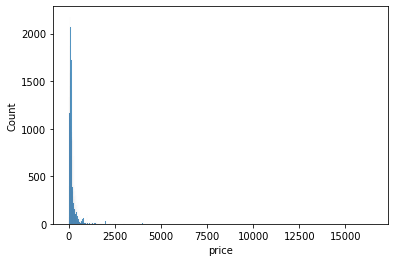

In [188]:
# Price distribution histogram
sns.histplot(data=listings, x=listings['price'])
plt.show()

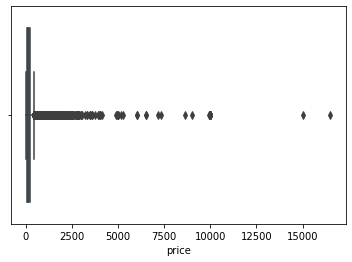

In [189]:
# Price distribution boxplot
sns.boxplot(x=listings['price'])
plt.show()

The histogram and boxplot above seem to confirm our initial suspicions of many major outliers in our data. We will deal with outliers in the **Clean and Validate the Data** section below. 

## Clean and Validate the Data

From loading and previewing our data above we could see a few NaN or null values in our data. Lets consider a few methods of dealing with null or missing values. First we can check each column for null values.

In [190]:
# Check for null values
listings.isnull().sum()

id                                    0
name                                 13
host_id                               0
host_name                            50
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8362
reviews_per_month                  8362
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           39876
dtype: int64

In some cases we can replace null values with some other acceptable value such as 0 or some an average value if it may help with our analysis.  For example we see many null values in the `reviews_per_month` column, meaning that there is no reviews. In this case we could replace any null values with 0 if this is an acceptable assumption and may help our analysis.  

In [191]:
# Replace null values where applicable
listings['reviews_per_month'].fillna(0,inplace=True)

We can also drop any columns we don't feel are useful to our analysis. In this case after previewing our data we find `id`, `name`, `host_id`, `host_name`, `last_review`, and `license` aren't useful in our case so we can drop them from our DataFrame.

In [192]:
# Drop any columns we don't feel are useful
listings.drop(['id','name','host_id','host_name','last_review','license'], axis=1, inplace=True)
listings.head()

neighbourhood_group        neighbourhood  latitude  longitude  \
0            Brooklyn           Greenpoint  40.73777  -73.95366   
1            Brooklyn           Kensington  40.64529  -73.97238   
2              Queens            Ridgewood  40.70309  -73.89963   
3               Bronx           Mott Haven  40.80635  -73.92201   
4           Manhattan  Morningside Heights  40.80630  -73.95985   

         room_type  price  minimum_nights  number_of_reviews  \
0       Hotel room    308               2                 42   
1     Private room    299              30                  9   
2  Entire home/apt    425              30                 13   
3     Private room     60              30                  0   
4     Private room     75              31                135   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.30                              30               217   
1               0.11                               9               356   
2               0.10                               6               365   
3               0.00                               1                83   
4               0.95                               1               219   

   number_of_reviews_ltm  
0                      4  
1                      0  
2                      0  
3                      0  
4                      4

We can check for null values once more to see if we have dealt with all missing values accordingly. We can now see we no longer have any missing values in our data.

In [193]:
# Re-check for null values
listings.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

From exploring our data earlier we saw some extreme outliers, for example a maximum price of $16500. In some cases it may be worth removing these outliers for our analysis.

In [194]:
# Remove outliers using IQR method
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

In [195]:
listings = listings[(listings['price'] >= (Q1 - 1.5 * IQR)) & (listings['price'] <= (Q3 + 1.5 * IQR))]

After removing outliers, we can check our price distribution histogram and boxplots to confirm any improvement to our data. As we can see below the histogram and boxplots are drastically improved after removed our outliers.

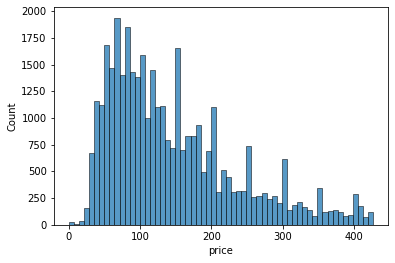

In [196]:
# Price distribution histogram
sns.histplot(data=listings, x=listings['price'])
plt.show()

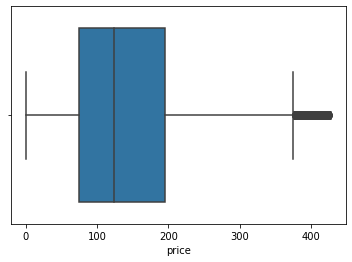

In [197]:
# Price distribution boxplot
sns.boxplot(x=listings['price'])
plt.show()

From these plots we can see the majority of Airbnb listings in NYC are priced within the \\$75-\\$200 range. In the next section we will dive even further into this analysis to see how neighbourhood and location plays a role on pricing and availability.

## Analyze the Data

Now that the data has been loaded and explored, we can continue to analyze the data further. With our key questions being how location and neighborhoods affect pricing and availability let's start by looking into listing distrubution, availability, and price per neighborhood.

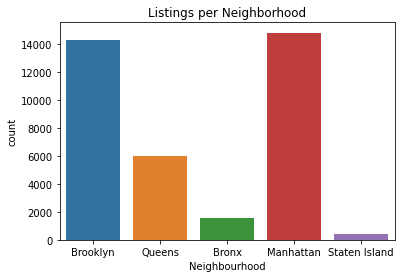

In [199]:
# Listings per neighbourhood
sns.countplot(data=listings, x=listings['neighbourhood_group'])
plt.title('Listings per Neighborhood')
plt.xlabel('Neighbourhood')
plt.show()

From the listing per neighbourhood plot above we can see Manhattan and Brooklyn have drastically most listings then the other neighbourhoods. This may make sense intuitively and suggest that Manhattan and Brooklyn are the most desirable areas for tourism and visitors to airbnb.

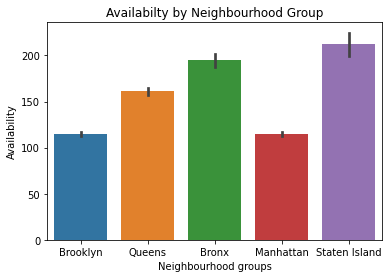

In [200]:
# Availability by neighbourhood
sns.barplot(data=listings, x='neighbourhood_group',y='availability_365')
plt.title("Availabilty by Neighbourhood Group")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability')
plt.show()

We also see that although Manhattan and Brooklyn have the greatest number of listings, they also have the lowest availability. This seems to agree with our initial hypothesis that Manhattan and Brooklyn are the most desirable areas for tourism and visitors to airbnb.

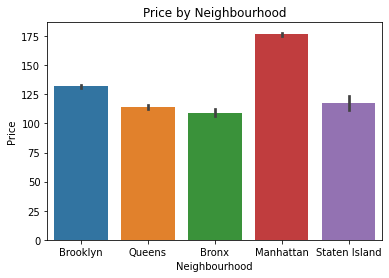

In [201]:
# Price by neighbourhood barplot
sns.barplot(data=listings,x="neighbourhood_group", y= "price")
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price by Neighbourhood')
plt.show()

Here we can see the prices for listings in Manhattan and Brooklyn are higher then the other neighbourhoods, this once again seems to agree with our initial hypothesis that Manhattan and Brooklyn are the most desirable areas for tourism and visitors to airbnb and thus come at a pricing premium.

If we'd like to dive even further into pricing per neighbourhood we can also make use of boxplots to show additional statistical information including minimum, first quartile, median, third quartile, and maximum pricing values.

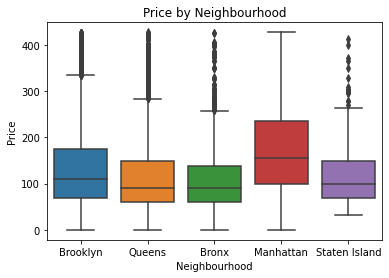

In [202]:
# Price by neighbourhood boxplot
sns.boxplot(data=listings,x="neighbourhood_group", y= "price")
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price by Neighbourhood')
plt.show()

Violin plot show additional statistical information similar to boxplots however they also help visualize the distribution as well.

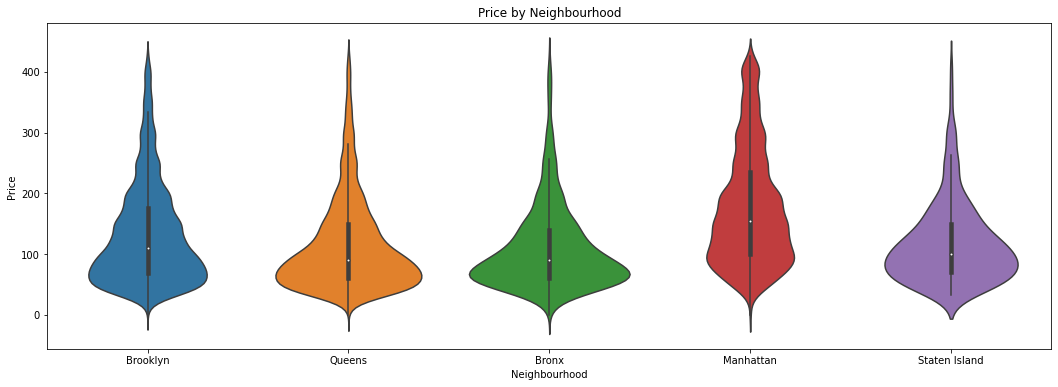

In [203]:
# Price by neighbourhood violinplot
plt.figure(figsize=(18, 6))
sns.violinplot(x=listings.neighbourhood_group, y= listings.price)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price by Neighbourhood')
plt.show()

Lets also investigate how pricing is affected by room type.

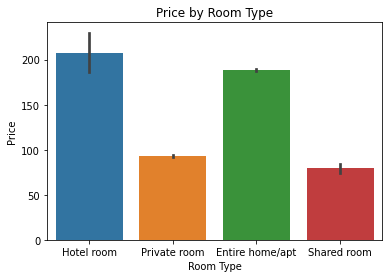

In [174]:
# Price by room type barplot
sns.barplot(data=listings,x="room_type", y= "price")
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price by Room Type')
plt.show()

From the visualization above it appears that hotel rooms and entire homes or appartments seem to have the highest price, where shared rooms have the lowest price. This should make sense intuitively as well as you would think a shared room would be less desirable and costly then an entire home.

We can investigate even further by looking into prices by neighbourhood for each specific room type.

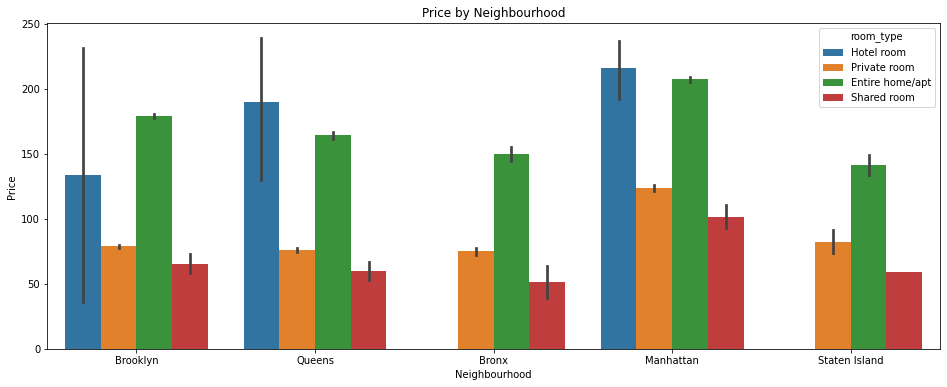

In [175]:
# Price by room type and neighbourhood barplot
plt.figure(figsize=(16, 6))
sns.barplot(data=listings, x="neighbourhood_group", y= "price", hue="room_type")
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Price by Neighbourhood')
plt.show()

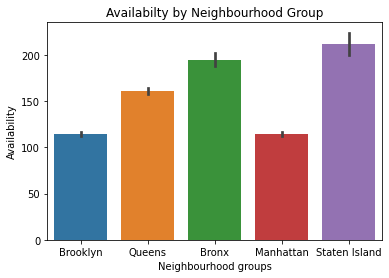

In [80]:
sns.barplot(x='neighbourhood_group',y='availability_365',data=listings)
plt.title("Availabilty by Neighbourhood Group")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability')
plt.show()

### Geospatial Visualization

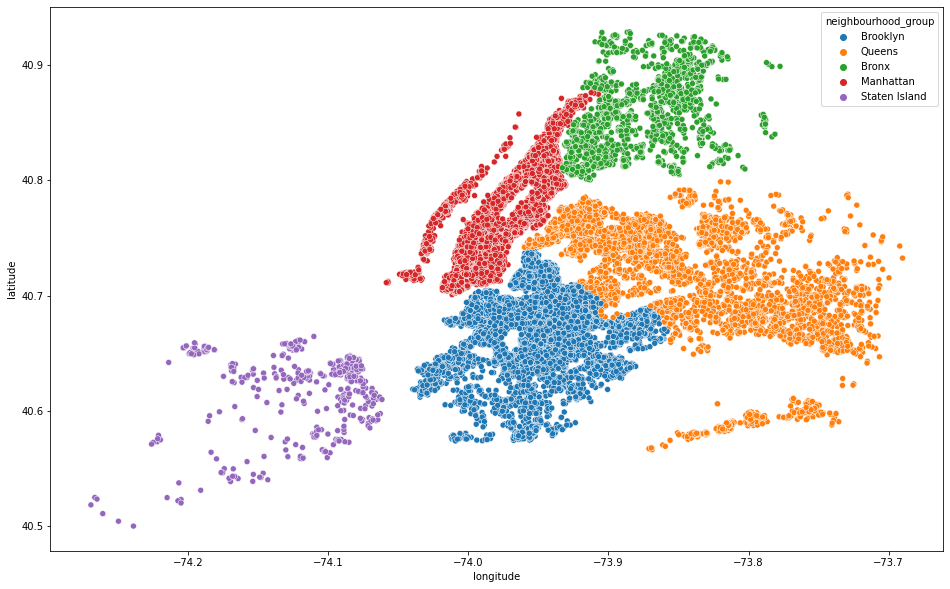

In [267]:
# Price by room type and neighbourhood barplot
plt.figure(figsize=(16, 10))
sns.scatterplot(data=listings, x='longitude', y='latitude', hue='neighbourhood_group',zorder=1)
plt.show()

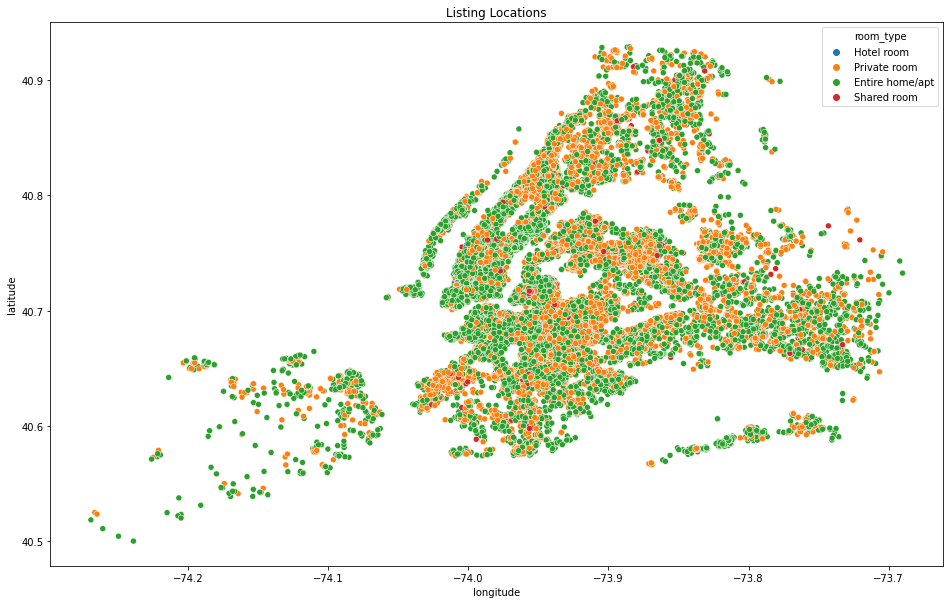

In [245]:
# Price by room type and neighbourhood barplot
plt.figure(figsize=(16, 10))
plt.title("Listing Locations")
sns.scatterplot(data=listings, x='longitude', y='latitude', hue='room_type')
plt.show()

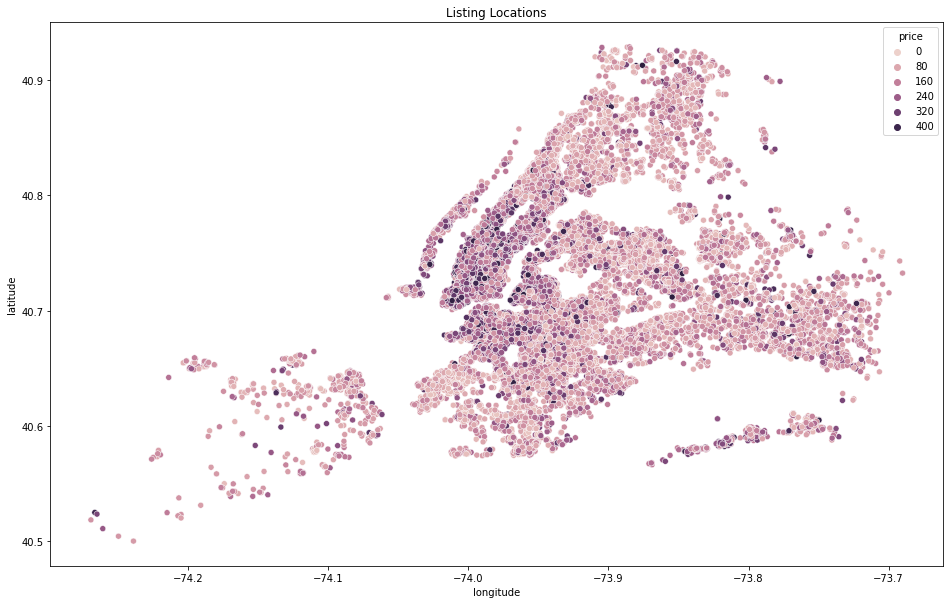

In [216]:
# Price by room type and neighbourhood barplot
plt.figure(figsize=(16, 10))
plt.title("Listing Locations")
sns.scatterplot(data=listings, x='longitude', y='latitude', hue='price')
plt.show()

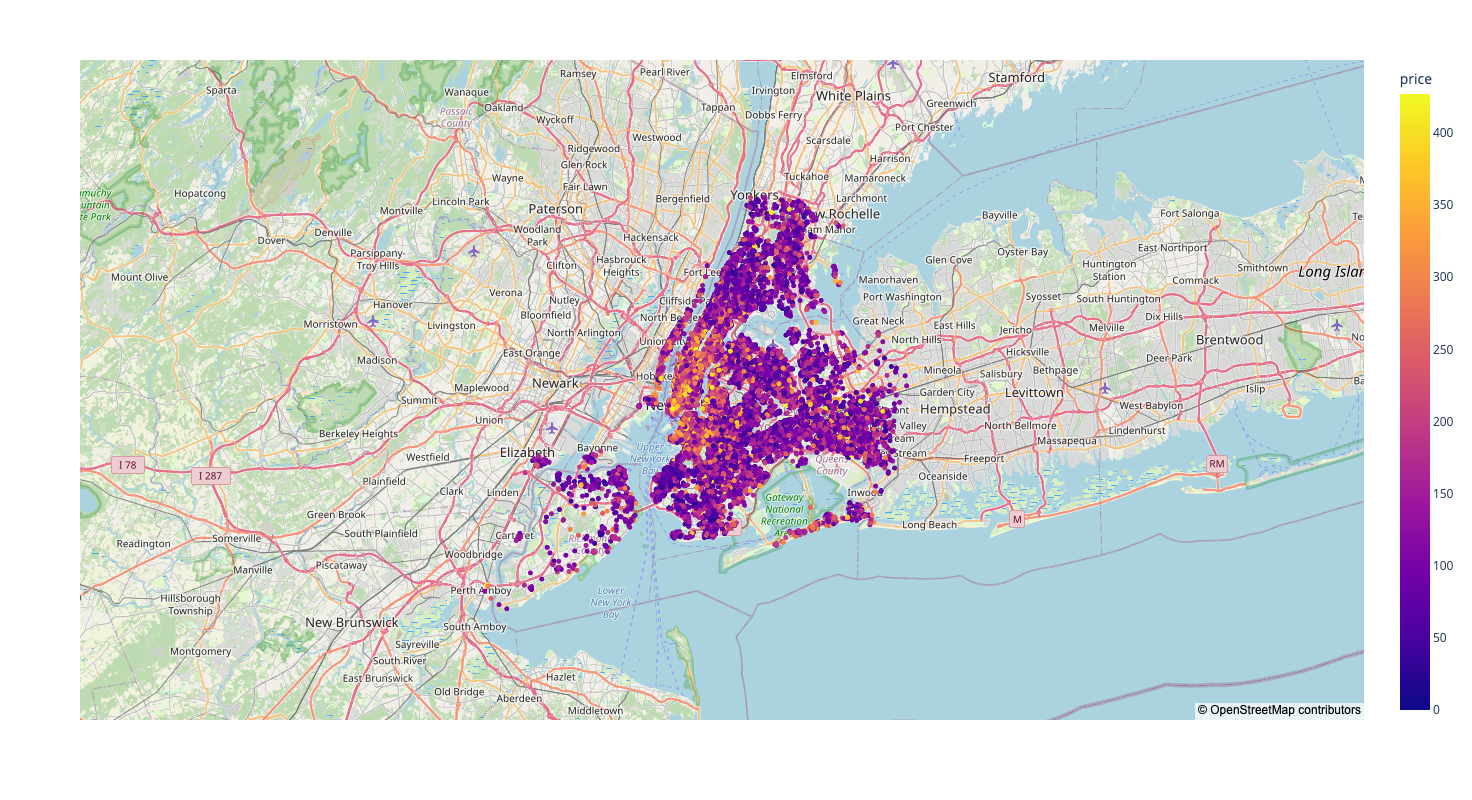

In [270]:
# Import plotly for overlaying maps on geospatial data analysis
import plotly.express as px

# Price by location
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", mapbox_style='open-street-map', width=1400, height=800, zoom=9, color='price')
fig.show()

## Findings and Conclusions

From the Exploratory Data Analysis (EDA) for the NYC Airbnb listing data we were able to gain a number of useful insights, visualizations and inferences.

In this analysis we examined listings across neighbourhoods, room types, and locations. In this project we were able to gain insights into some of the questions posed in the project goals scoping such as:
- What types of rooms are most popular?
    - We found entire homes generally have the highest demand and price.
- How does location affect property price and demand?
    - We found Manhattan and Brooklyn to be the most desirable boroughs, with lower availability and higher prices.
- Which nieghborhoods have the most listings?
    - Similarly, we found Manhattan and Brooklyn to have the most listings.

## Potential Future Research